In [13]:
#data cleaning for JME_Country_Estimates
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
#  loading the CSV file with a different encoding
df = pd.read_csv('JME_Country_Estimates_May_2023 (2).csv', encoding='ISO-8859-1')

print(df.head())


  ISO code Country and areas Survey year  Year* United Nations Region  \
0      AFG       AFGHANISTAN        1997   1997                  Asia   
1      AFG       AFGHANISTAN        2004   2004                  Asia   
2      AFG       AFGHANISTAN        2013   2013                  Asia   
3      AFG       AFGHANISTAN        2018   2018                  Asia   
4      ALB           ALBANIA        2005   2005                Europe   

  United Nations Sub-Region                      SDG Region UNICEF Region  \
0             Southern Asia  Central Asia and Southern Asia            SA   
1             Southern Asia  Central Asia and Southern Asia            SA   
2             Southern Asia  Central Asia and Southern Asia            SA   
3             Southern Asia  Central Asia and Southern Asia            SA   
4           Southern Europe     Northern America and Europe           ECA   

  UNICEF Sub-Region WHO Region  ... Stunting Stunting Footnote  \
0                SA       EMRO  

<Figure size 1200x600 with 0 Axes>

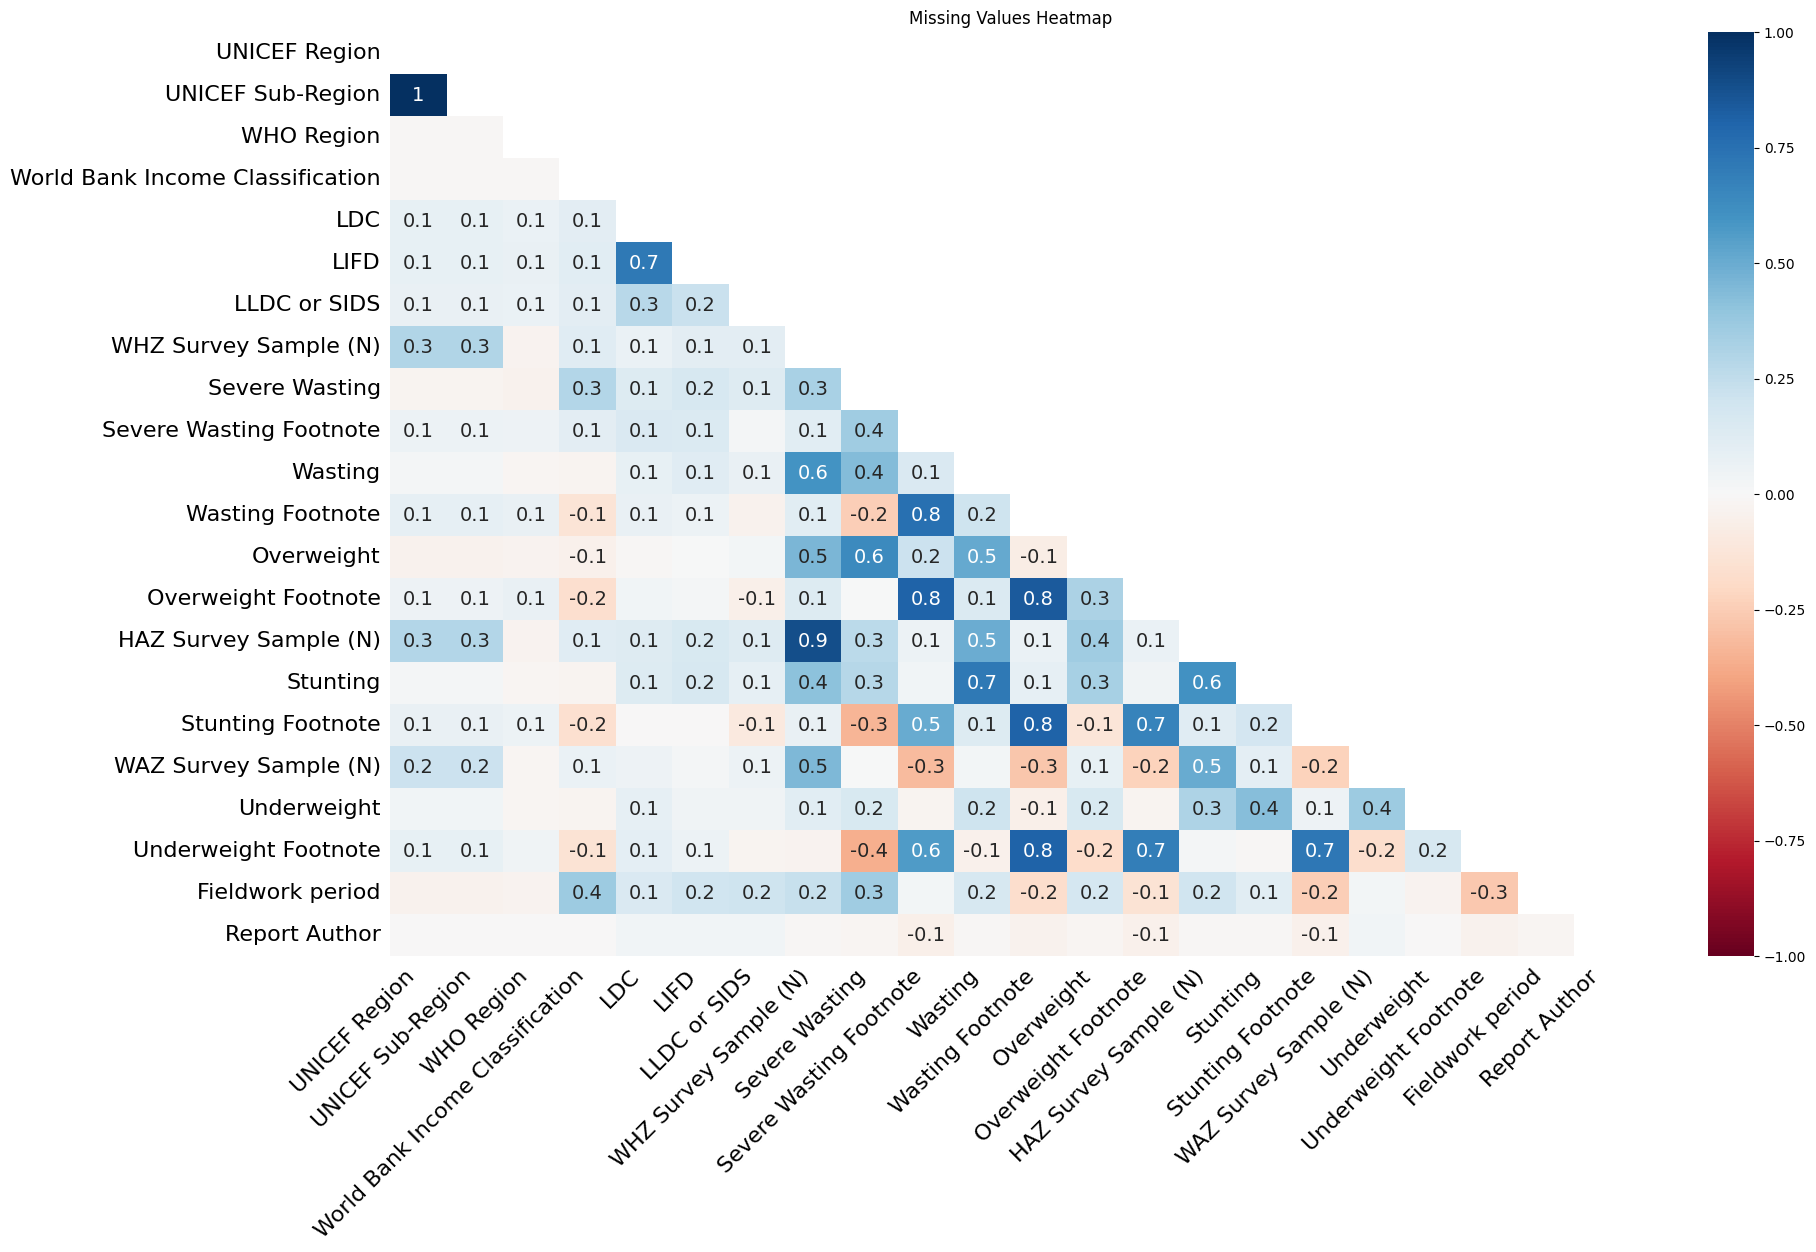

In [14]:
# Visualize missing data with a heatmap
plt.figure(figsize=(12, 6))
msno.heatmap(df)
plt.title('Missing Values Heatmap')
plt.show()

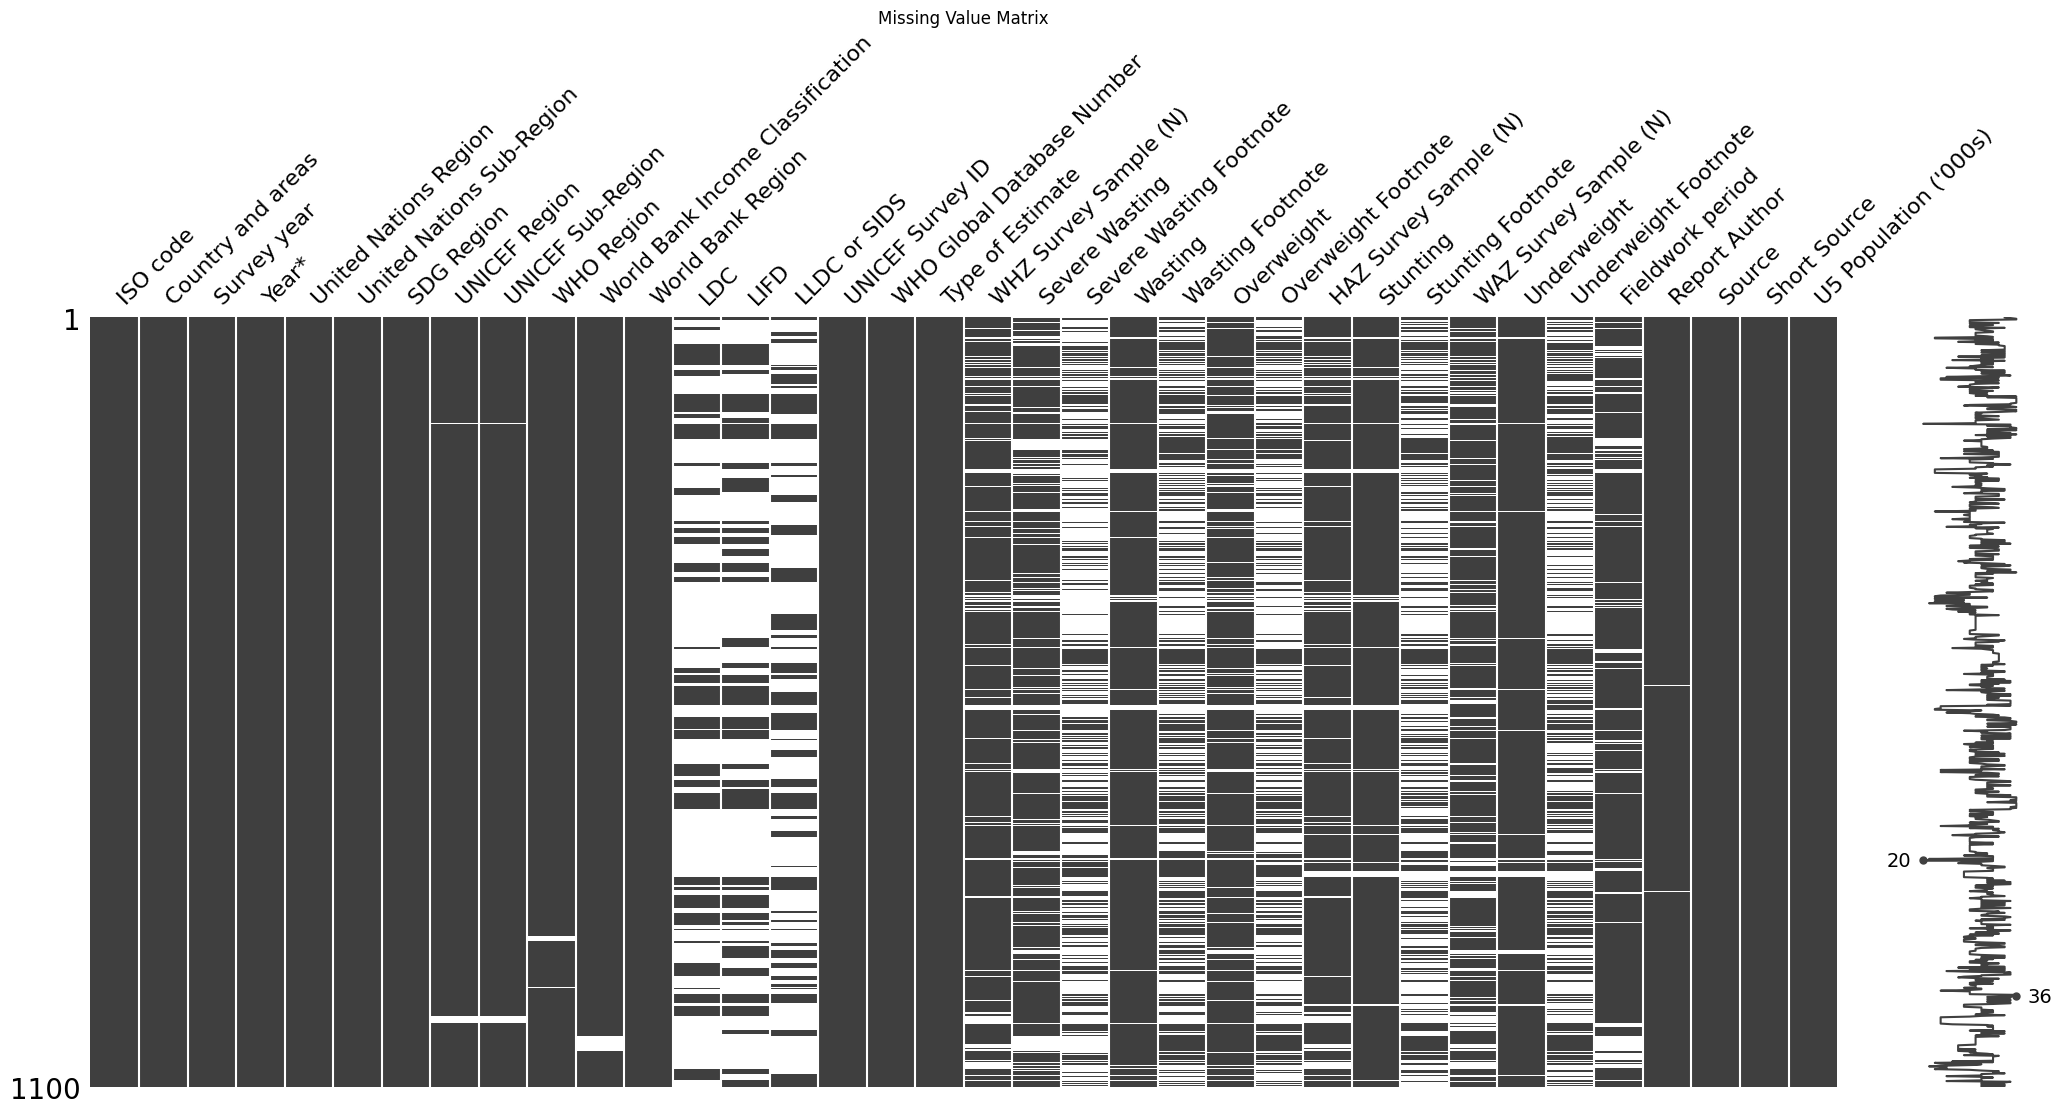

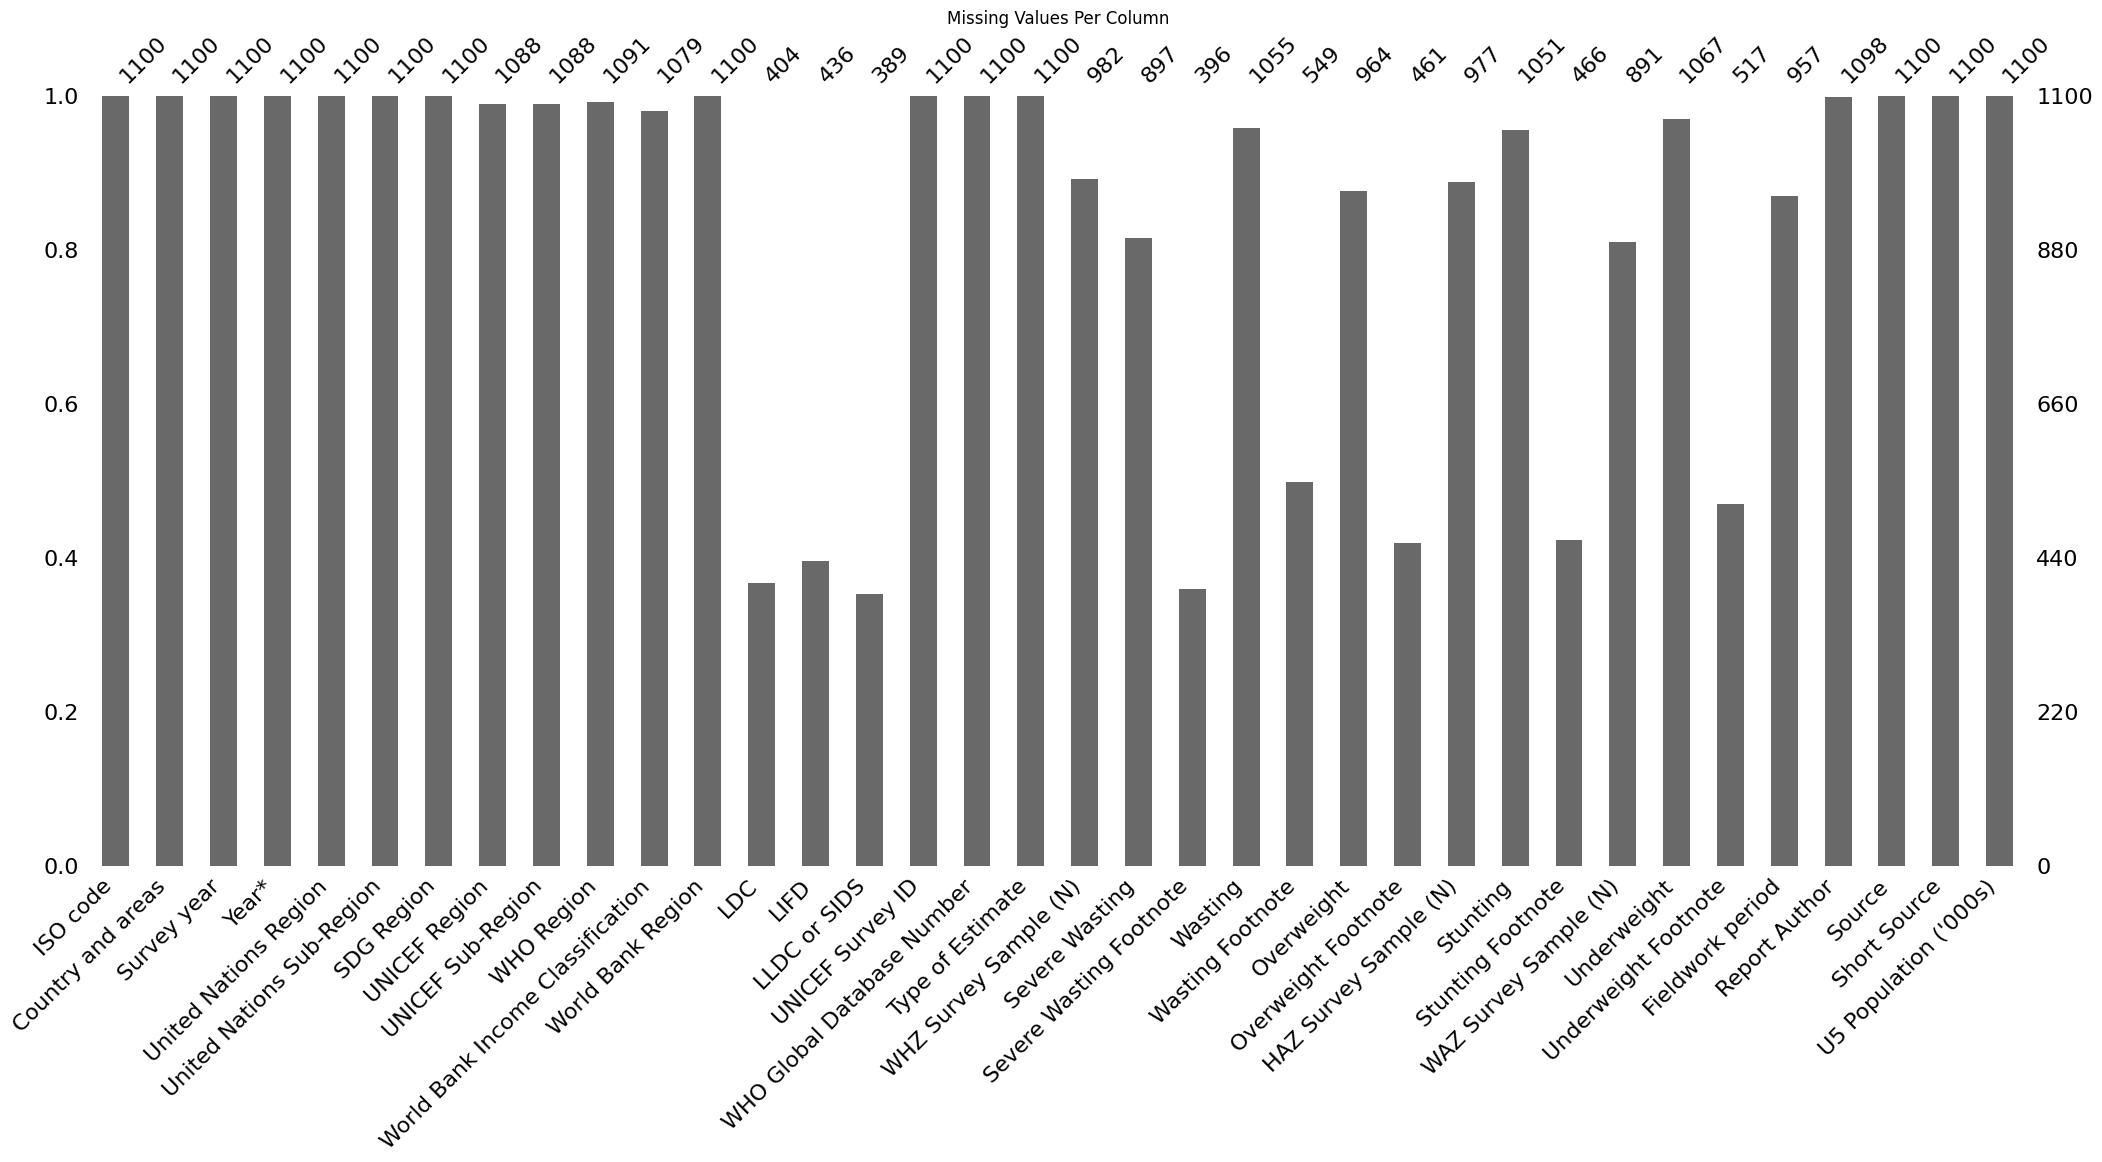

In [15]:
# Show missing value heatmap
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

# Or bar chart
msno.bar(df)
plt.title('Missing Values Per Column')
plt.show()

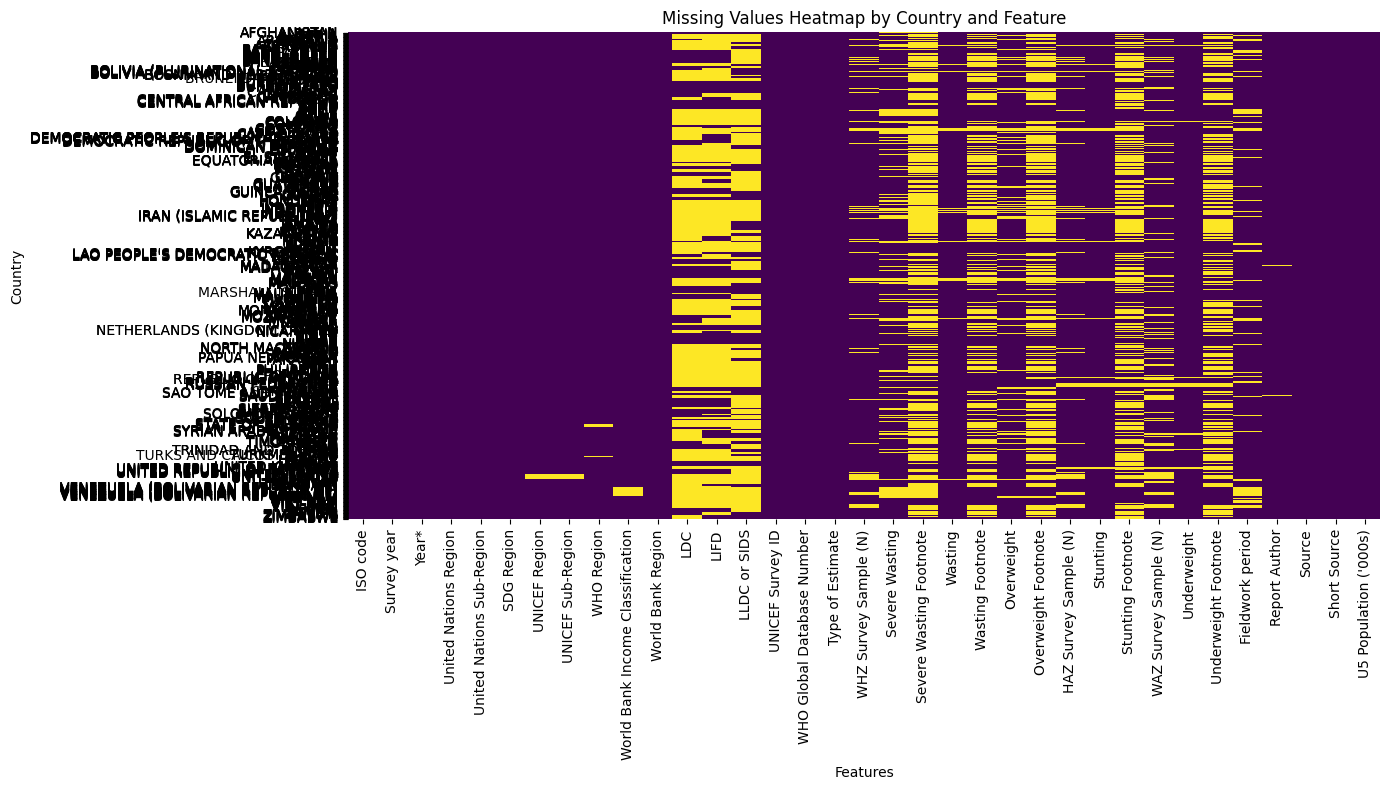

In [16]:
# Set the 'Country and areas' column as the index
df.set_index('Country and areas', inplace=True)

# Create a missing values matrix (True/False)
missing_values_matrix = df.isnull()

# Plot the missing values heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(missing_values_matrix, cmap='viridis', cbar=False, xticklabels=True, yticklabels=True)
plt.title('Missing Values Heatmap by Country and Feature')
plt.xlabel('Features')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Categorical columns: Index(['ISO code', 'Survey year', 'United Nations Region',
       'United Nations Sub-Region', 'SDG Region', 'UNICEF Region',
       'UNICEF Sub-Region', 'WHO Region', 'World Bank Income Classification',
       'World Bank Region', 'LDC', 'LIFD', 'LLDC or SIDS', 'Type of Estimate',
       'Severe Wasting Footnote', 'Wasting Footnote', 'Overweight Footnote',
       'Stunting Footnote', 'Underweight Footnote', 'Fieldwork period',
       'Report Author', 'Source', 'Short Source'],
      dtype='object')
Numerical columns: Index(['Year*', 'UNICEF Survey ID', 'WHO Global Database Number',
       'WHZ Survey Sample (N)', 'Severe Wasting', 'Wasting', 'Overweight',
       'HAZ Survey Sample (N)', 'Stunting', 'WAZ Survey Sample (N)',
       'Underweight', 'U5 Population ('000s)'],
      dtype='object')
Number of duplicate rows: 0


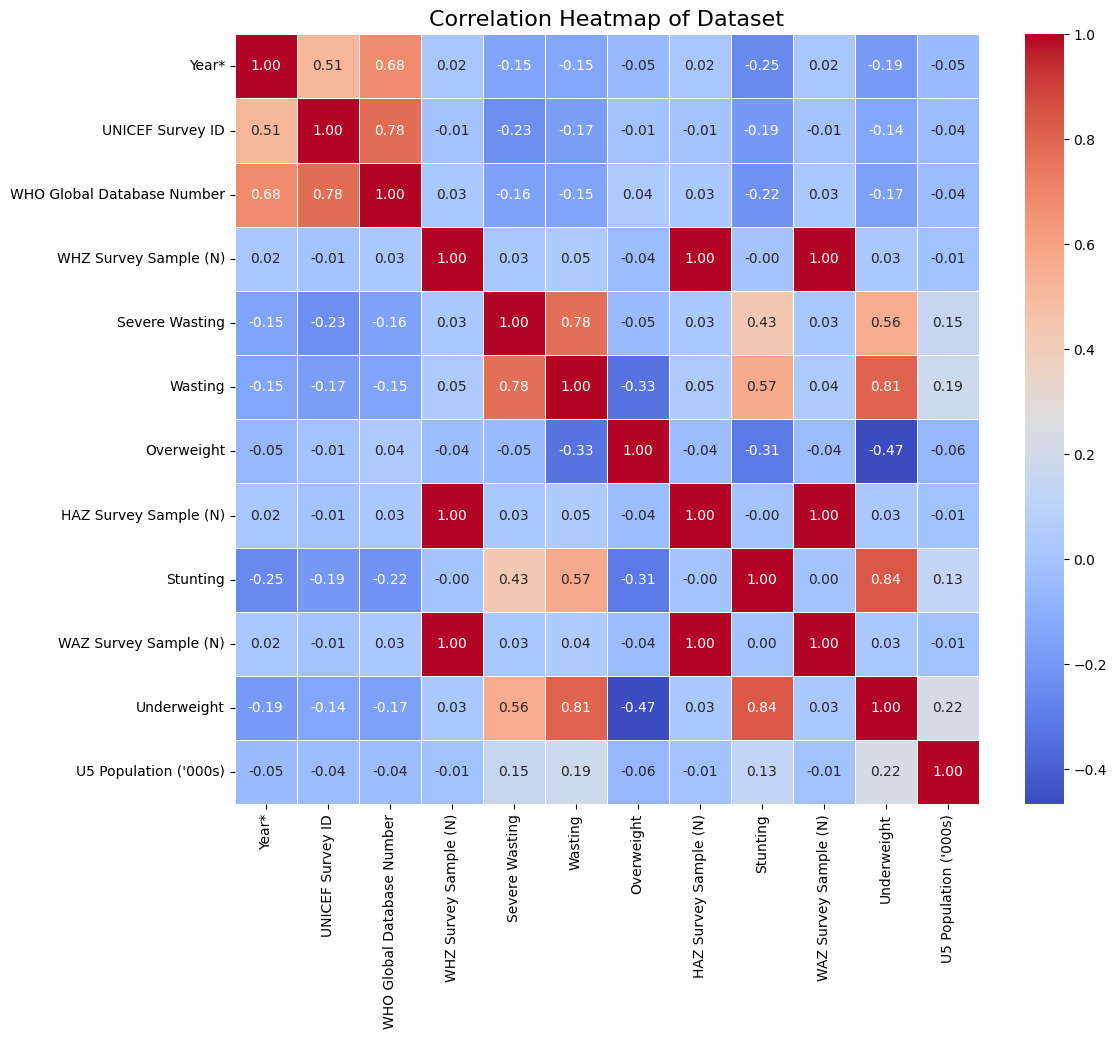

In [17]:
#  Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

#  Handle missing values by Filling numerical columns with mean and categorical columns with mode
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Clean numerical columns that have footnotes or text embedded
def clean_numeric_column(column):
    # Remove non-numeric characters and convert to float
    return pd.to_numeric(column.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Columns with potential footnotes
columns_to_clean = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
for col in columns_to_clean:
    df[col] = clean_numeric_column(df[col])

#  Encode categorical columns if needed (for heatmap visualization)
# Label encoding for categorical columns (if needed for analysis)
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

#  Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

#  Generate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

#  Create the Heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title("Correlation Heatmap of Dataset", fontsize=16)
plt.show()

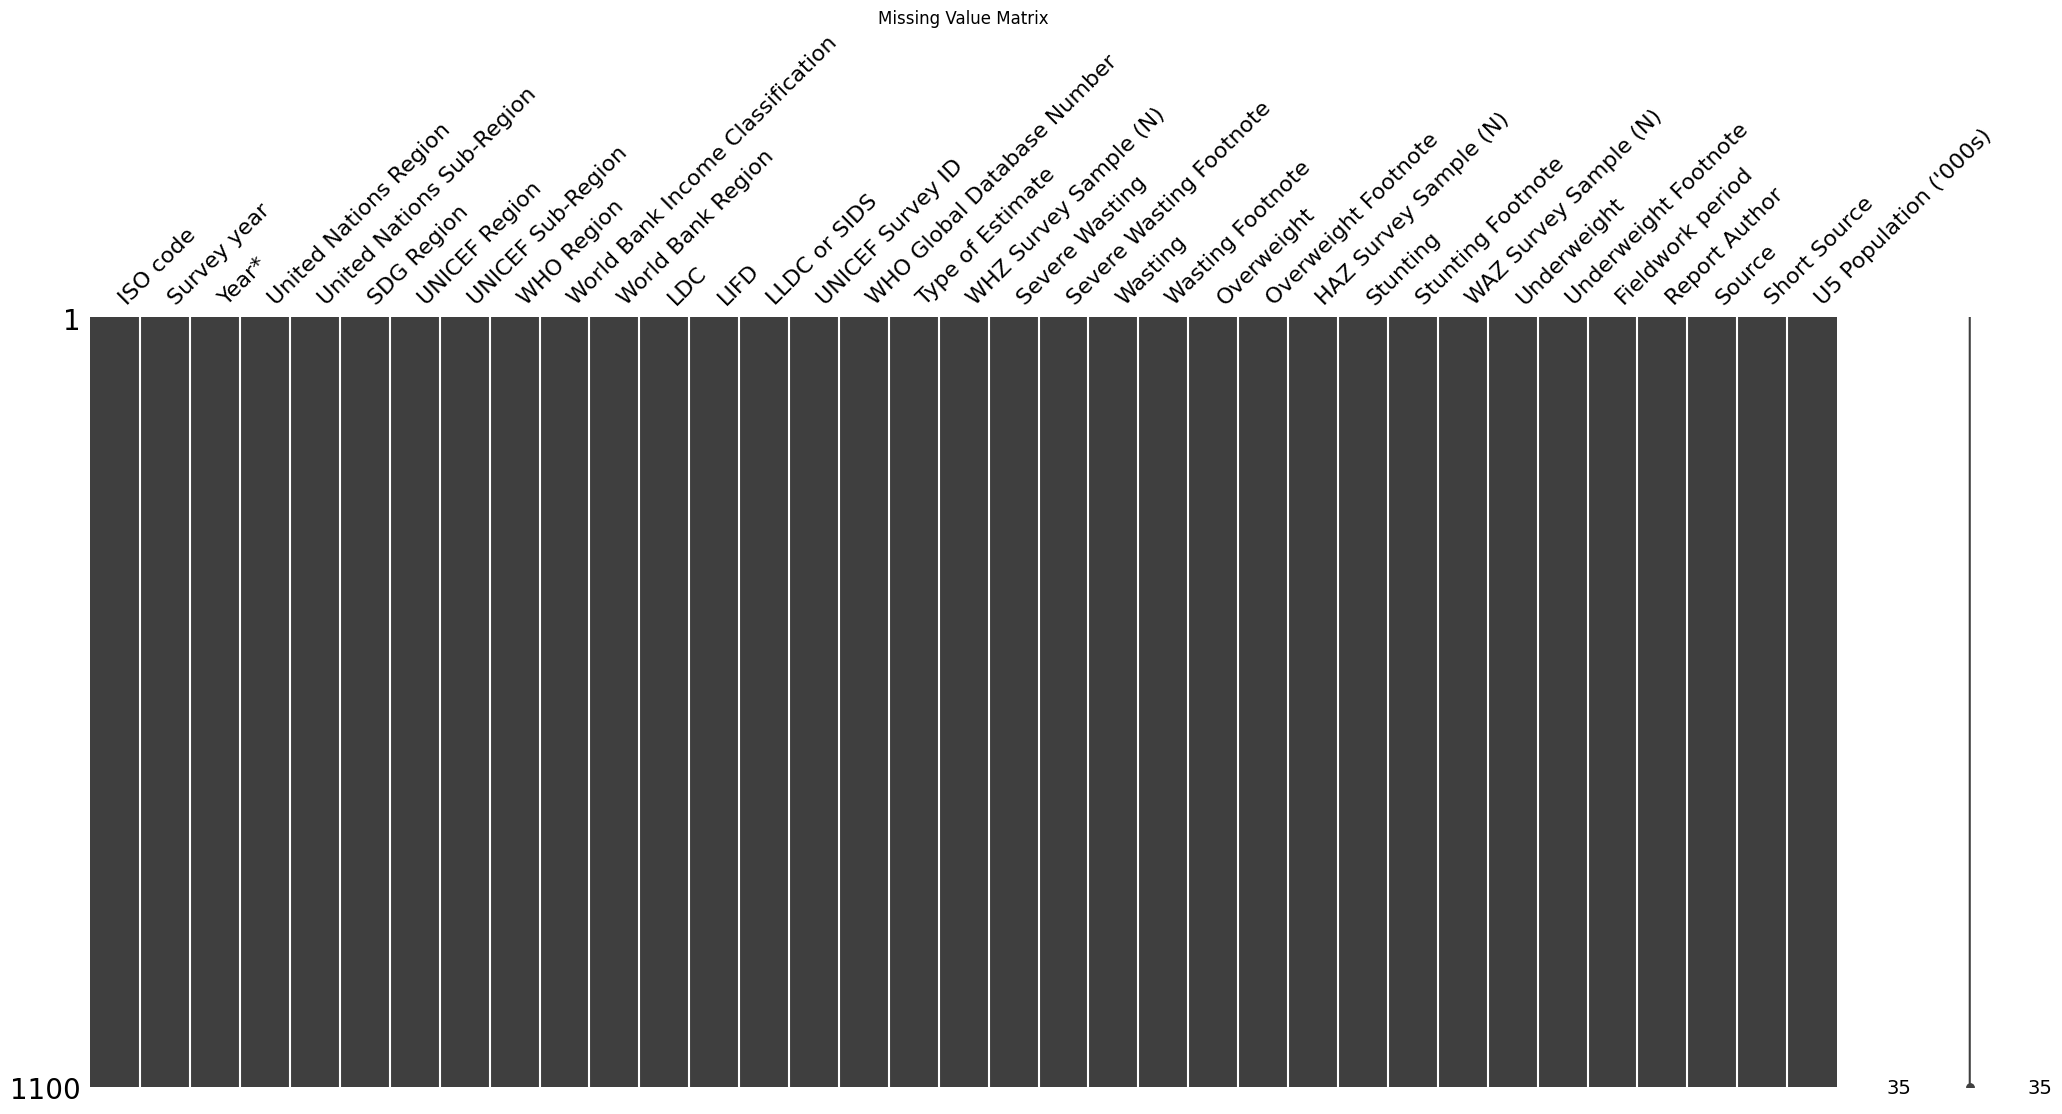

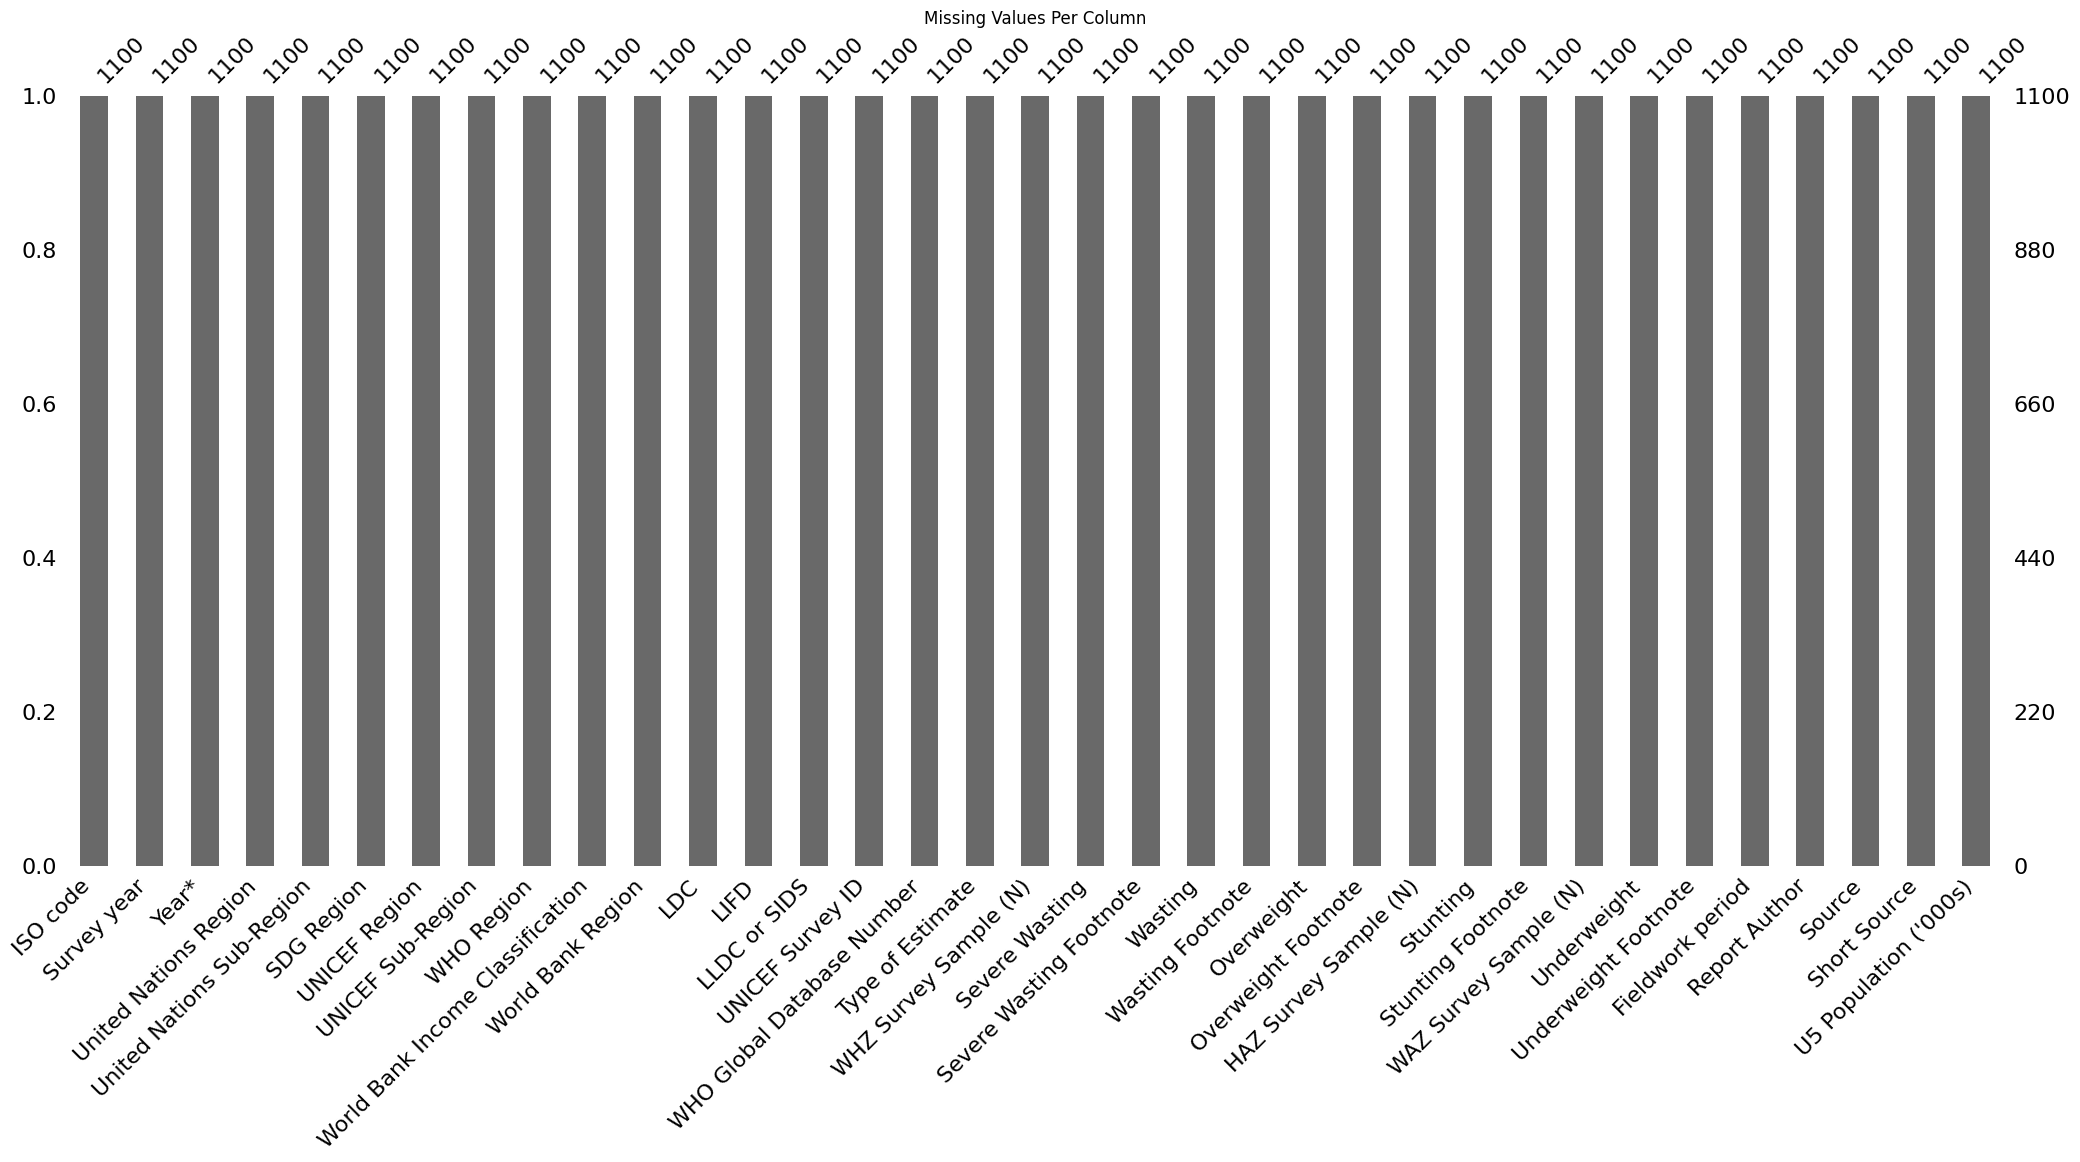

In [18]:
# Show missing value heatmap
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

# Or bar chart
msno.bar(df)
plt.title('Missing Values Per Column')
plt.show()

C:\Users\monic\AppData\Local\Temp\ipykernel_32532\2262445500.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_by_country_total.values, y=missing_by_country_total.index, palette="viridis")


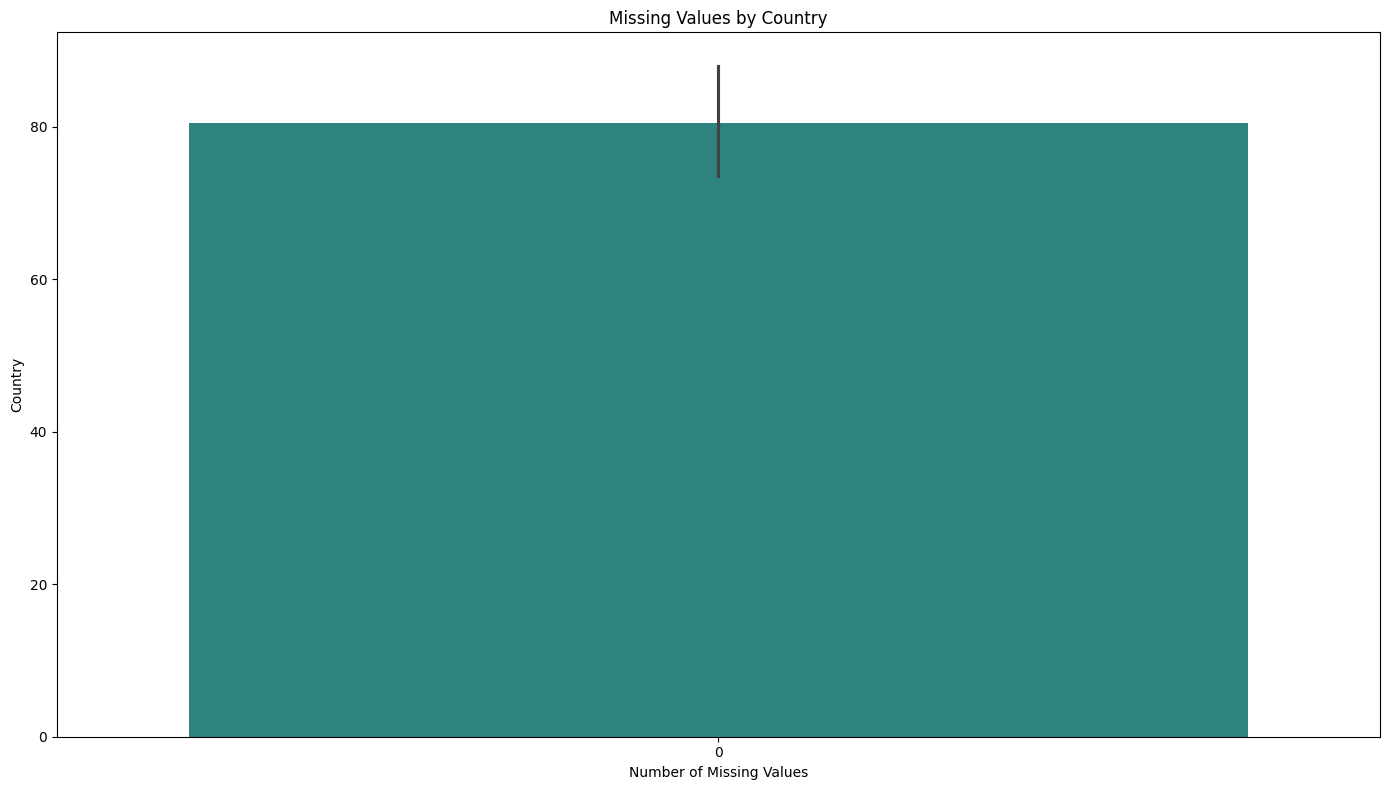

In [21]:

# Calculate missing values by country
missing_by_country = df.isnull().sum(axis=1)  # Sum missing values across rows (per country)
df['missing_count'] = missing_by_country

# Group by country and calculate total missing values for each
missing_by_country_total = df.groupby('Country and areas')['missing_count'].sum().sort_values(ascending=False)

# Plot missing values by country
plt.figure(figsize=(14, 8))
sns.barplot(x=missing_by_country_total.values, y=missing_by_country_total.index, palette="viridis")
plt.title('Missing Values by Country')
plt.xlabel('Number of Missing Values')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
